# Housing Prices Predictions
Matthew Dalby & Duc Nguyen

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

## Importing data
Our dataset is titled "House Prices - Advanced Regression Techniques" and comes from kaggle.

In [2]:
train_set = pd.read_csv("train.csv")

## Feature selection

### Using KBest features from SKlearn


In [3]:
#Remove NA 
train_set=train_set.fillna(train_set.mean())

C:\Users\kirby\AppData\Local\Temp\ipykernel_4432\1997449239.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_set=train_set.fillna(train_set.mean())


In [4]:
#Convert catagorical to numerical

#identify all categorical variables
cat_columns = train_set.select_dtypes(['object']).columns

#convert all categorical variables to numeric
train_set[cat_columns] = train_set[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [5]:
#Select KBest features

from sklearn.feature_selection import SelectKBest, f_classif

target_col = "SalePrice"
X = train_set.loc[:, train_set.columns != target_col]
y = train_set.loc[:, target_col]

print("Train shape before feature reduction:",X.shape)

X_new = SelectKBest(f_classif, k=15).fit_transform(X,y)

print("Train shape after feature reduction:",X_new.shape)

Train shape before feature reduction: (1460, 80)
Train shape after feature reduction: (1460, 15)


In [6]:
#Create Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=0)

## Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression


linear_regression_model = LinearRegression().fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

linear_regressor_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(linear_regressor_accuracy)

rmspe_linear_regressor = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_linear_regressor)

0.1213482701865089
16.788743438193546


Our first linear model has an error of ~12% using MAPE.
Using RMSPE, it is around 16%.

## Polynomial Regression Model

In [8]:
# Polynomial Regression Model of degree 2 and of degree 3
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)

X_polytrain = poly_reg.fit_transform(X_train)
X_polytest = poly_reg.fit_transform(X_test)


lin_reg2 = LinearRegression()

lin_reg2.fit(X_polytrain,y_train)
y_pred = lin_reg2.predict(X_polytest)

poly_regression_accuracy_deg2 = mean_absolute_percentage_error(y_test, y_pred)
print(poly_regression_accuracy_deg2)

rmspe_poly_regressor_deg2 = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_poly_regressor_deg2)

0.11321869965205286
16.21975381899448


In [9]:
poly_reg=PolynomialFeatures(degree=3)

X_polytrain = poly_reg.fit_transform(X_train)
X_polytest = poly_reg.fit_transform(X_test)


lin_reg2 = LinearRegression()

lin_reg2.fit(X_polytrain,y_train)
y_pred = lin_reg2.predict(X_polytest)

poly_regression_accuracy_deg4 = mean_absolute_percentage_error(y_test, y_pred)
print(poly_regression_accuracy_deg4)

rmspe_poly_regressor_deg3 = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_poly_regressor_deg3)

0.25928790416262326
61.83987363353204


Our polynomial regression model of degree 2 was twice as accurate as our model of degree 3.
With 10% vs 21% error rates. Using RSMPE, it has around 16% and 62% error rate.

## Random Forest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

random_forest_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(random_forest_accuracy)

rmspe_random_forrest = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_random_forrest)

0.08742102065384307
12.39330935255398


Our random forest model has an error of ~8%. With RSMP, it is around 12%.

# Other Linear Models
Huber regression, RANSACRegressor, and Theil Sen Regression

In [11]:
#Huber Regression
from sklearn.linear_model import HuberRegressor

huber_regressor = HuberRegressor(max_iter=1000).fit(X_train,y_train)

y_pred = huber_regressor.predict(X_test)
huber_regressor_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(huber_regressor_accuracy)

rmspe_huber = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_huber)

0.14382480037709386
21.779583956847674


In [12]:
#RANSACRegressor
from sklearn.linear_model import RANSACRegressor

RANSAC_regressor = RANSACRegressor().fit(X_train,y_train)

y_pred = RANSAC_regressor.predict(X_test)
RANSAC_regressor_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(RANSAC_regressor_accuracy)

rmspe_RANSAC = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_RANSAC)

0.11188361206192203
15.725578606388058


In [13]:
#Theil Sen Regression
from sklearn.linear_model import TheilSenRegressor
Theil_regressor = TheilSenRegressor().fit(X_train,y_train)

y_pred = Theil_regressor.predict(X_test)
Theil_regressor_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(Theil_regressor_accuracy)

rmspe_Theil = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_Theil)

0.11265912372517559
15.772841289724099


# Results


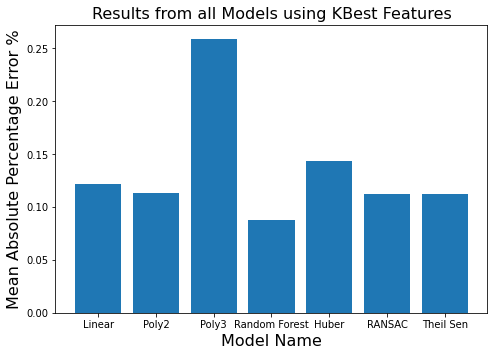

In [14]:
#Print accuracy of all models
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Linear', 'Poly2', 'Poly3', 'Random Forest', 'Huber', 'RANSAC', 'Theil Sen']
acc = [linear_regressor_accuracy,poly_regression_accuracy_deg2,poly_regression_accuracy_deg4,random_forest_accuracy,huber_regressor_accuracy
,RANSAC_regressor_accuracy,Theil_regressor_accuracy]
ax.bar(model,acc)

ax.set_ylabel('Mean Absolute Percentage Error %', fontsize = 16)
ax.set_xlabel('Model Name', fontsize = 16)
ax.set_title('Results from all Models using KBest Features', fontsize = 16)
plt.show()

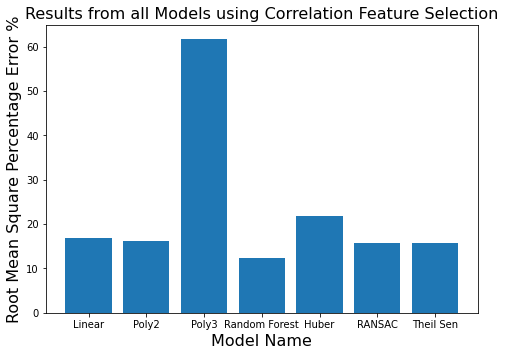

In [15]:
#Print accuracy of all models as bar chart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Linear', 'Poly2', 'Poly3', 'Random Forest', 'Huber', 'RANSAC', 'Theil Sen']
acc = [rmspe_linear_regressor,rmspe_poly_regressor_deg2,rmspe_poly_regressor_deg3,rmspe_random_forrest,rmspe_huber
,rmspe_RANSAC,rmspe_Theil]
ax.bar(model,acc)

ax.set_ylabel('Root Mean Square Percentage Error %',fontsize=16)
ax.set_xlabel('Model Name',fontsize=16)
ax.set_title('Results from all Models using Correlation Feature Selection',fontsize=16)
plt.show()